openCVをもちいて数独の問題の画像を取得するテスト

In [0]:
%matplotlib inline

colaboratory用に画像ファイルを持ってくる

In [2]:
from google.colab import files
uploaded  = files.upload()

Saving sudoku.png to sudoku.png


ふつうに表示

width: 1236
height: 1242


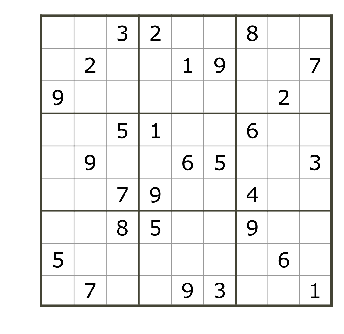

In [44]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("sudoku.png")

height, width = img.shape[:2]

print("width: " + str(width))
print("height: " + str(height))

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

写真と同じように平滑化して二値化する...が、うまくいかないのでここは飛ばしてみる

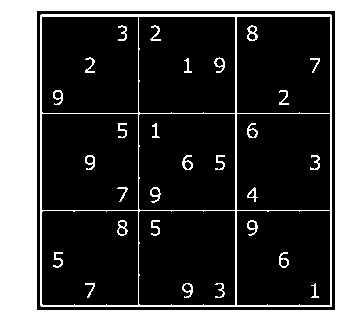

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

plt.axis("off")
#plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")
plt.show()

後から編集しやすいように900*900にリサイズしてみたが線とずれてしまっているので、輪郭抽出してからリサイズすることにしてここは飛ばす

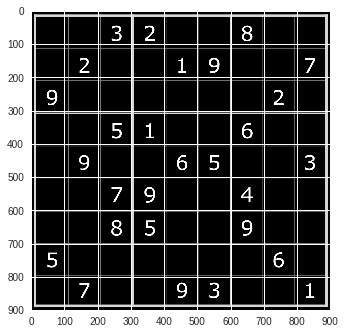

In [14]:
img  = cv2.imread("sudoku.png")
img = cv2.resize(img, (900, 900))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.show()

外枠抽出成功

0 0 1236 1242


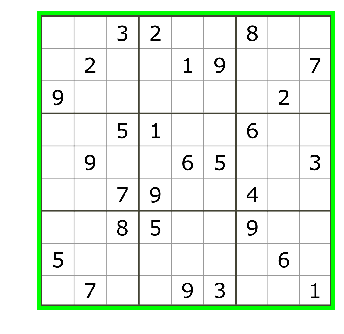

In [52]:
img = cv2.imread("sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

#for pt in cnts:
#x, y, w, h = cv2.boundingRect(pt)
print(x, y, w, h)
cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 30)

plt.axis("off")
#plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

実験

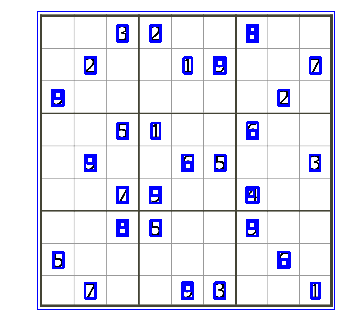

In [56]:
img = cv2.imread("sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cnts1 = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]


for pt in cnts1:
  x, y, w, h = cv2.boundingRect(pt)
  #print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 10)


plt.axis("off")
#plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

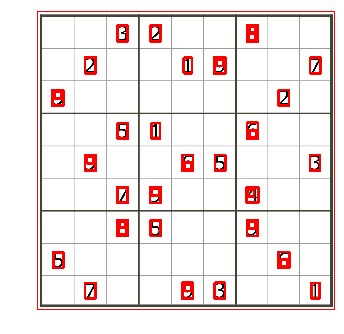

In [57]:
img = cv2.imread("sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cnts2 = cv2.findContours(gray, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)[1]


for pt in cnts2:
  x, y, w, h = cv2.boundingRect(pt)
  #print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 10)


plt.axis("off")
#plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

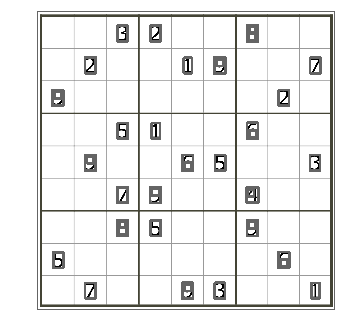

In [58]:
img = cv2.imread("sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cnts3 = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[1]


for pt in cnts3:
  x, y, w, h = cv2.boundingRect(pt)
  #print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (100, 100, 100), 10)


plt.axis("off")
#plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1137 1129 35 64
199 1129 44 64
737 1128 42 66
602 1128 44 66
67 1002 42 65
1001 1001 45 66
471 869 42 65
870 868 45 66
331 868 46 66
869 732 48 64
333 732 43 64
468 731 45 66
738 598 42 65
1132 597 42 66
602 597 45 66
198 597 44 66
475 465 35 64
334 465 42 65
871 464 45 66
1002 327 43 65
64 327 45 66
1132 194 44 64
608 194 35 64
735 193 45 66
199 193 44 65
871 60 45 66
470 60 43 65
333 60 42 66
0 0 1236 1242


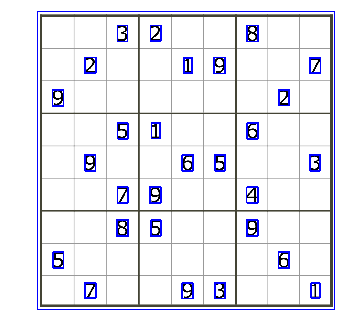

In [64]:
img = cv2.imread("sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cnts1 = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[1]


for pt in cnts1:
  x, y, w, h = cv2.boundingRect(pt)
  if w < 30 : continue
  print(x, y, w, h)
  cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)


plt.axis("off")
#plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

ここから外枠でトリミングして900*900にリサイズする

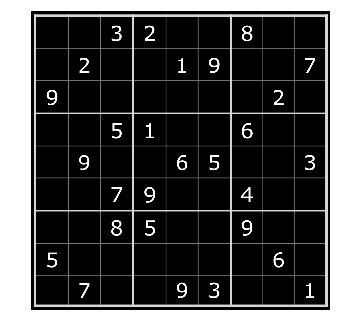

In [50]:
imgC = img[x:h, y:w]
imgC = cv2.resize(imgC, (900, 900))

plt.axis("off")
plt.imshow(cv2.cvtColor(imgC, cv2.COLOR_BGR2GRAY))
plt.show()